## BASIC PACKAGES

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# DATASETS

In [3]:
T_set = pd.read_csv("InsNova_data_2023_train.csv")

In [4]:
T_numerical = T_set.loc[:, ["veh_value", "exposure", "veh_age",
                    "agecat", "max_power", "driving_history_score",
                   "e_bill", "trm_len", "credit_score", "high_education_ind",
                   "clm", "numclaims", "claimcst0"]]

In [5]:
T_response = T_numerical[["veh_value", "exposure", "veh_age",
                    "agecat", "max_power", "driving_history_score",
                   "e_bill", "trm_len", "credit_score", "high_education_ind"]]

In [6]:
T_claim = T_numerical["claimcst0"]

In [12]:
def include_0_claim_amounts(ans):
    if ans == "yes":
        T_response = T_numerical[["veh_value", "exposure", "veh_age",
                    "agecat", "max_power", "driving_history_score",
                   "e_bill", "trm_len", "credit_score", "high_education_ind"]].iloc[(T_numerical["claimcst0"] != 0).values]
        T_claim = T_numerical["claimcst0"].iloc[(T_numerical["claimcst0"] != 0).values]
    if ans == "no":
        T_response = T_numerical[["veh_value", "exposure", "veh_age",
                                  "agecat", "max_power", "driving_history_score",
                                  "e_bill", "trm_len", "credit_score", "high_education_ind"]]
        T_claim = T_numerical["claimcst0"]
    
    return T_response, T_claim

## PCA

In [80]:
T_r, T_c = include_0_claim_amounts("yes")
T_rn, T_cn = include_0_claim_amounts("no")

In [89]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as SS

In [94]:
scaled_data = preprocessing.scale(T_r.T)
scaled_data_n = preprocessing.scale(T_rn.T)
scaled_data_c = preprocessing.scale(T_c.T)
scaled_data_cn = preprocessing.scale(T_cn.T)
 
pca = PCA().fit(scaled_data)
pca_n = PCA().fit(scaled_data_n)

pca_data = pca.transform(scaled_data)
pca_data_n = pca_n.transform(scaled_data_n)

len(scaled_data[0])

1542

In [83]:
pca = PCA().fit(T_r)
pca_n = PCA().fit(T_rn)

pca_data = pca.transform(T_r)
pca_data_n = pca_n.transform(T_rn)

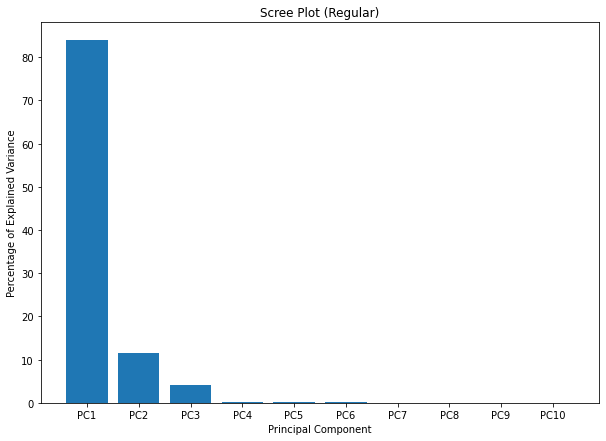

In [84]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
fig, ax = plt.subplots(figsize =(10, 7))
ax.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot (Regular)')
plt.show()

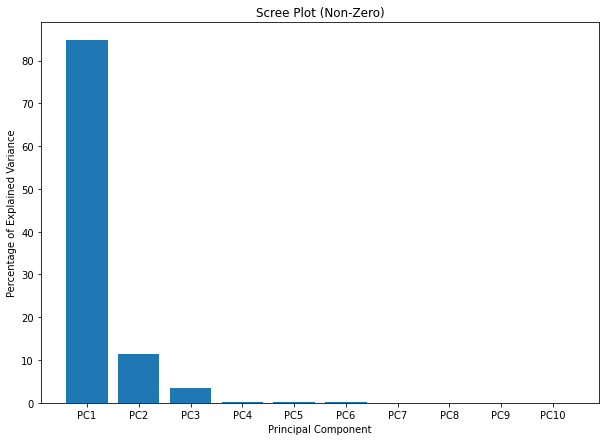

In [76]:
per_var = np.round(pca_n.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
fig, ax = plt.subplots(figsize =(10, 7))
ax.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot (Non-Zero)')
plt.show()

In [77]:
df = pd.DataFrame(data = pca_data,
                  columns=["PC_1", "PC_2", "PC_3", "PC_4", "PC_5",
                           "PC_6", "PC_7", "PC_8", "PC_9", "PC_10"])
df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-79.069999,-20.394560,-7.680823,-1.497742,1.546139,0.174770,-0.226947,-0.318748,-0.167176,-0.063883
1,-81.707796,-0.315797,1.630424,4.557450,0.456475,0.330586,-0.322237,-0.186535,0.847342,0.136275
2,-7.164092,36.526919,-3.311018,4.542211,-0.970658,-0.799718,-0.348046,0.527079,-0.295763,-0.035735
3,77.284403,2.217389,-10.019491,-1.695848,2.072489,-0.960669,-0.080541,0.759061,0.707386,0.073599
4,88.275124,-4.843571,9.435160,-1.719446,-0.276710,2.091427,-0.816534,-0.246053,-0.173704,-0.082984
...,...,...,...,...,...,...,...,...,...,...
1537,-11.630492,7.583812,-7.400057,-1.549339,0.133216,-0.817165,1.070173,-0.315096,0.878429,0.047377
1538,23.983444,45.061596,-1.354223,4.537962,0.325855,0.580117,-0.467226,-0.210277,0.839294,0.143995
1539,-64.816813,-12.483674,17.117053,4.482913,-2.529471,0.732170,-0.637499,-0.377608,-0.212448,0.153146
1540,2.009169,-20.554818,5.222523,-1.610336,1.750049,1.447523,0.608934,-0.286550,-0.171673,-0.029649


In [78]:
T_c

12         209.047053
48        1586.249277
78         212.451560
85        2463.345293
87       33895.135760
             ...     
22581     8566.158611
22583      239.981071
22587      685.432264
22614      280.403348
22616     1253.261110
Name: claimcst0, Length: 1542, dtype: float64

In [79]:
df_n = pd.DataFrame(data = pca_data_n,
                    columns=["PC_1", "PC_2", "PC_3", "PC_4", "PC_5",
                             "PC_6", "PC_7", "PC_8", "PC_9", "PC_10"])
df_n = df_n[["PC_1", "PC_2", "PC_3"]]

## SETUP FOR REGRESSIONS

In [37]:
response_varb = ["PC_1", "PC_2", "PC_3"]

In [40]:
from itertools import combinations
from itertools import permutations

In [42]:
res_comb = []

for n in range(1,4):
    r_c = list(combinations(response_varb, n))
    
    for r in r_c:
        res_comb.append(list(r))

In [43]:
res_perm = []

for n in range(1,4):
    r_p = list(permutations(response_varb, n))
    
    for r in r_p:
        res_perm.append(list(r))

## MULTIPLE LINEAR REGRESSION

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import f

In [52]:
alpha = 0.05

best_p_val = 1
best_reg_varb = []
n = len(T_c)
print(T_c)
print(n)

for r_c in res_comb:
    T_x = df[r_c]
    print(len(T_x))
        
    model = LinearRegression().fit(T_x, T_c)
    
    Rsq = model.score(T_x, T_c)
    k = len(r_c)
    
    F_score = (Rsq / k) / ((1 - Rsq) / (n - k - 1))
    
    p_val = 1 - f.cdf(F_score, k, n-k-1)
    print(f"Regression: {r_c}")
    
    if p_val <= alpha:
        print(f"\tPasses at {alpha} level of significance")
    
    if p_val <= alpha and p_val <= best_p_val:
        best_p_val = p_val
        best_reg_varb = r_c
    
    print(f"\tP-Value: {p_val}")
    
    print("")

print("\n")

print(f"BEST Regression: {best_reg_varb}")
print(f"\tP-Value: {best_p_val}")

print("")

12         209.047053
48        1586.249277
78         212.451560
85        2463.345293
87       33895.135760
             ...     
22581     8566.158611
22583      239.981071
22587      685.432264
22614      280.403348
22616     1253.261110
Name: claimcst0, Length: 1542, dtype: float64
1542
10


ValueError: Found input variables with inconsistent numbers of samples: [10, 1542]

	Passes at 0.05 level of significance
	P-Value: 0.0397663404001396


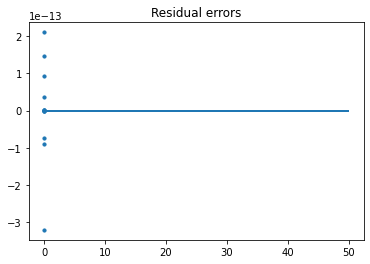

In [26]:
alpha = 0.05

best_p_val = 1
best_p_r = []

T_x = df[["veh_value", "exposure", "veh_age","agecat"]]
T_y = df["claimcst0"]

n = len(T_y)
k = 3

the_reg_object = LinearRegression().fit(T_x, T_y)

Rsq = the_reg_object.score(T_x, T_y)

F_score = (Rsq / k) / ((1 - Rsq) / (n - k - 1))

p_val = 1 - f.cdf(F_score, k, n-k-1)

if p_val <= alpha:
    print(f"\tPasses at {alpha} level of significance")

print(f"\tP-Value: {p_val}")

plt.scatter(the_reg_object.predict(T_x), the_reg_object.predict(T_x) - T_y, s=10)
 
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
plt.title("Residual errors")
plt.show()